[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fisamz/Repositorio_MCDAA/blob/main/Tarea5/Tarea5.ipynb)

# Tarea 5 — Agrupamiento 
**Alumno:** Fisam Zavala  
**Dataset:** Mental Health and Lifestyle Habits (2019–2024)  
**Fuente:** [Kaggle – Atharva Soundankar](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


## K-Means Clustering

En esta primera parte se aplicará el algoritmo **K-Means**, uno de los métodos de agrupamiento no supervisado más utilizados para identificar estructuras subyacentes en datos numéricos.  
Este algoritmo busca particionar los datos en *k* grupos (clusters) de manera que cada observación pertenezca al grupo cuyo centroide (media de las observaciones del grupo) esté más cercano.

Matemáticamente, K-Means minimiza la suma de las distancias cuadradas entre los puntos y sus centroides:

$$
J = \sum_{i=1}^{k} \sum_{x_j \in C_i} ||x_j - \mu_i||^2
$$ 

donde:  
\( C_i \): conjunto de puntos asignados al clúster *i*  
\( \mu_i \): centroide del clúster *i*



El algoritmo sigue los pasos:
1. Seleccionar *k* centroides iniciales (puede hacerse aleatoriamente).
2. Asignar cada punto al clúster más cercano según distancia euclidiana.
3. Recalcular los centroides como el promedio de los puntos asignados.
4. Repetir los pasos 2 y 3 hasta que los centroides se estabilicen o se alcance el número máximo de iteraciones.

### Estrategia para determinar el número óptimo de clústeres
Existen varias métricas para determinar el número adecuado de grupos *k*.  
En este análisis se usarán dos métodos:
- **Método del Codo (Elbow Method)**: evalúa la inercia (suma de distancias al centroide) para diferentes valores de *k* y busca el punto donde la reducción deja de ser significativa.  
- **Coeficiente de Silhouette**: mide qué tan bien está asignado cada punto a su clúster; valores cercanos a 1 indican mejor separación entre grupos.

### Objetivo de esta sección
- Limpiar y seleccionar las variables numéricas del dataset.  
- Aplicar K-Means con distintos valores de *k*.  
- Determinar el número óptimo de grupos usando las métricas anteriores.  
- Visualizar los resultados con gráficos y análisis interpretativo.


Variables numéricas utilizadas para el clustering: ['Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
Dimensión del conjunto de datos: (3000, 5)


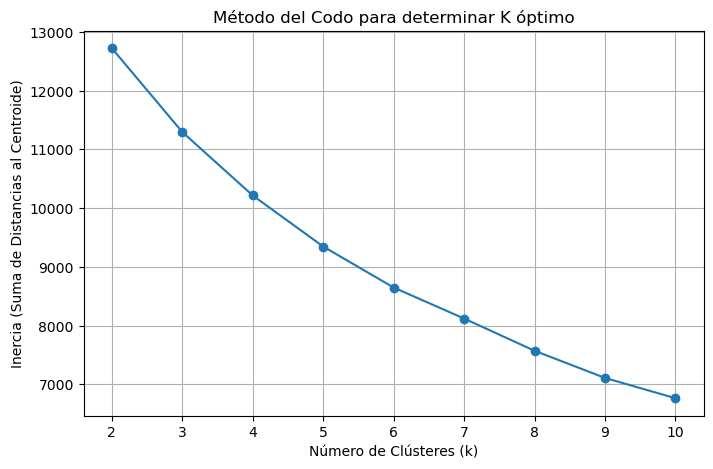

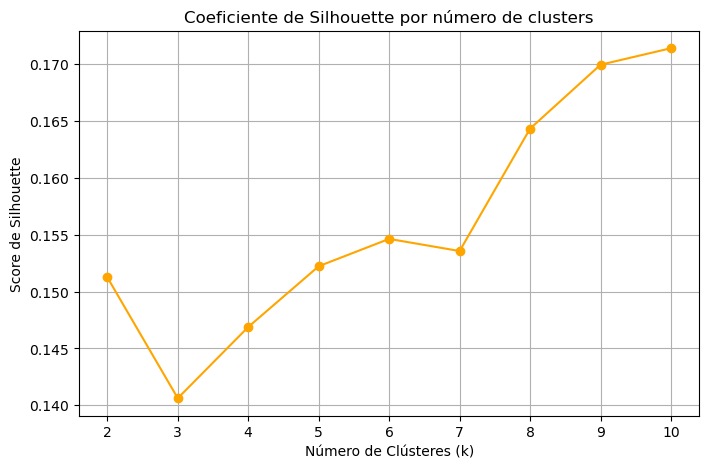

,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
Cluster,,,,,
0,6.46,38.15,6.14,5.97,3.07
1,6.41,41.51,3.21,5.53,5.35
2,6.56,38.49,6.15,4.91,7.75


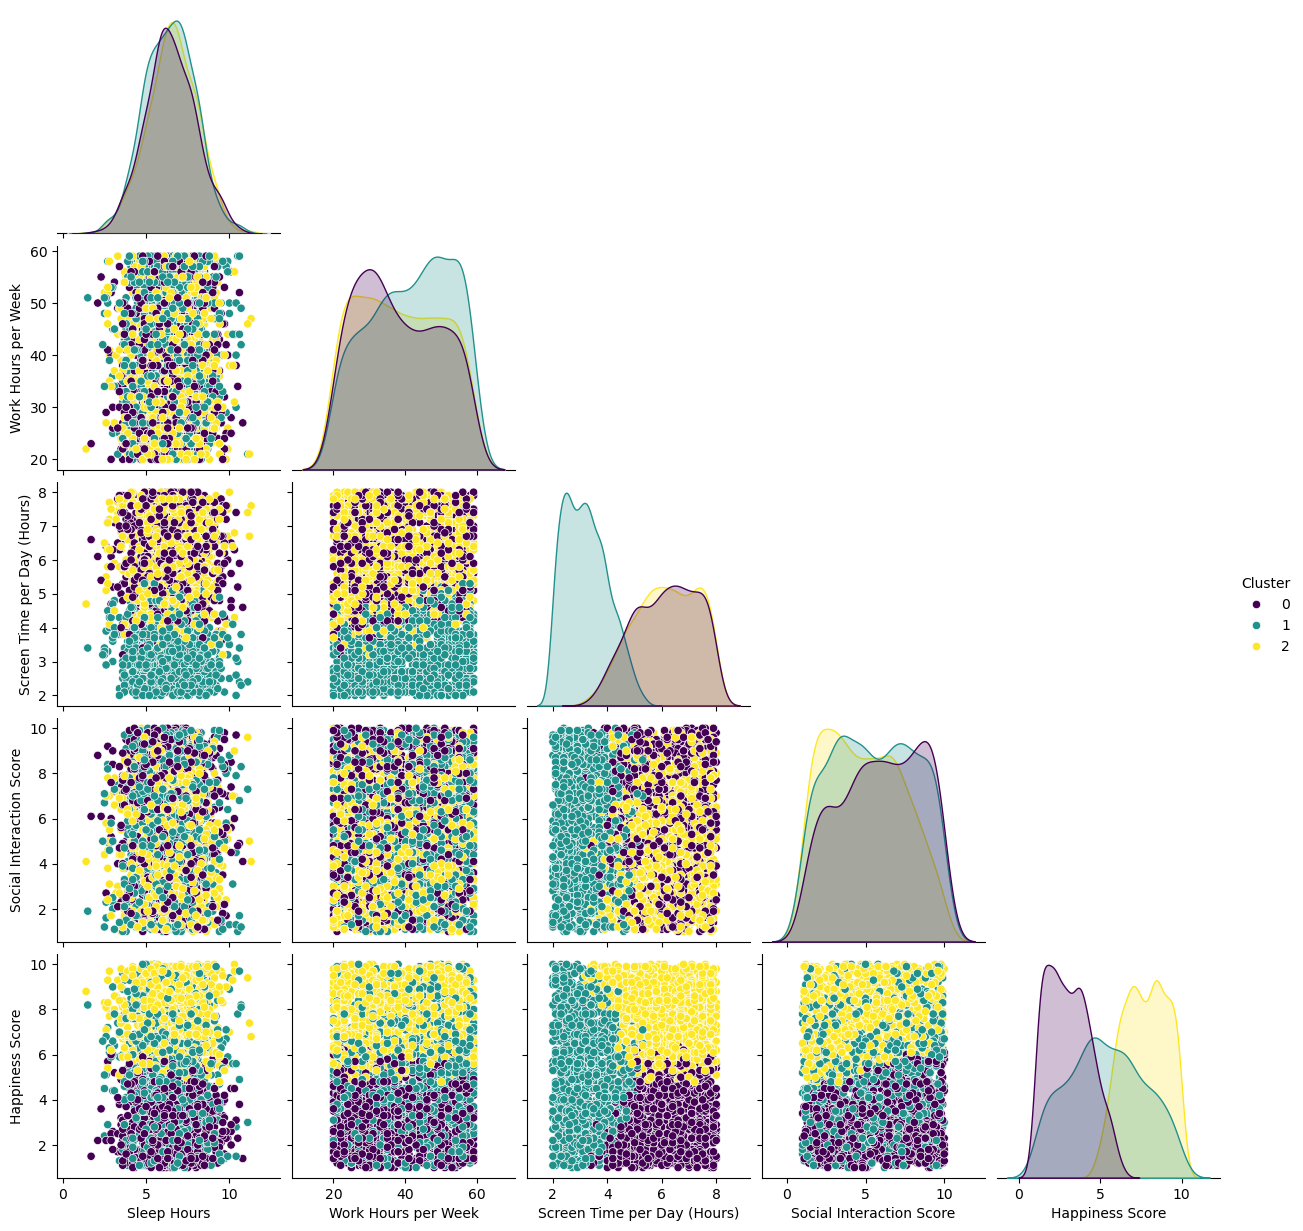

In [28]:
# ==============================================
# TAREA 5 - Agrupamiento (K-Means)
# ==============================================

# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Cargar el dataset
df = pd.read_csv("../Data/Mental_Health_Lifestyle_Dataset.csv")

# 3. Seleccionar solo variables numéricas
num_df = df.select_dtypes(include=[np.number]).dropna()

# Excluir la variable 'Age' del análisis
if 'Age' in num_df.columns:
    num_df = num_df.drop(columns=['Age'])

print(f"Variables numéricas utilizadas para el clustering: {list(num_df.columns)}")
print(f"Dimensión del conjunto de datos: {num_df.shape}")

# 4. Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

# 5. Determinar número óptimo de clústeres (Método del Codo)
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.title('Método del Codo para determinar K óptimo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (Suma de Distancias al Centroide)')
plt.grid(True)
plt.show()

# 6. Validación adicional con Coeficiente de Silhouette
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silhouette por número de clusters')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Score de Silhouette')
plt.grid(True)
plt.show()

# 7. Aplicar K-Means con el K óptimo (ejemplo: k=3, se puede ajustar tras revisar gráficas)
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_scaled)

num_df['Cluster'] = labels_final

# 8. Visualización básica de los clusters
#plt.figure(figsize=(8,6))
#sns.scatterplot(x=num_df.iloc[:,0], y=num_df.iloc[:,1], hue=num_df['Cluster'], palette='viridis')
#plt.title('Visualización de Clústeres (K-Means)')
#plt.xlabel(num_df.columns[0])
#plt.ylabel(num_df.columns[1])
#plt.legend(title='Cluster')
#plt.show()

# 9. Análisis descriptivo de cada clúster
cluster_summary = num_df.groupby('Cluster').mean().round(2)
display(cluster_summary)

sns.pairplot(num_df, hue='Cluster', corner=True, palette='viridis')
